# 画图的plot

目标：

直方图，得有吧；

2D函数图、3D函数图也得有吧；

散点图，得有吧；高维散点图也得有吧；

子图，得有吧；

## 直方图

直方图里有什么：横轴是离散的分类，纵轴是每个分类的占比。

In [1]:
import matplotlib.pyplot as plt
import torch
from torch.onnx.symbolic_opset9 import tensor

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号



In [2]:
# 生成示例数据
data = (torch.randn(250).mul_(10) + 170)  # 创建一维数据，用torch代替了np的功能

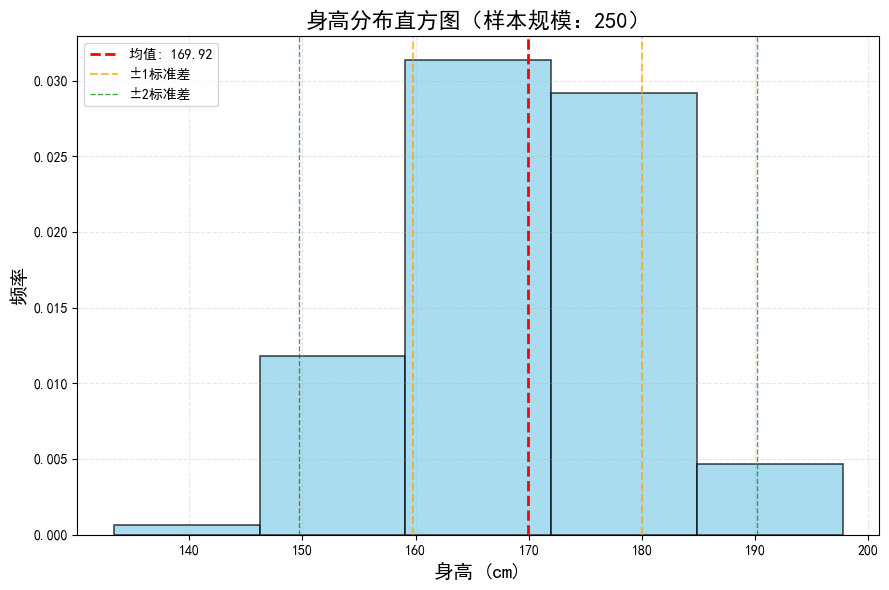

In [3]:
# 创建图形和坐标轴
plt.figure(figsize=(9, 6))  # 设置图形大小

# 绘制直方图
# 基本参数:
# data: 输入数据
# bins: 直方图的柱子数量或边界值
# alpha: 透明度 (0-1)
# color: 柱子的颜色
# edgecolor: 柱子边缘颜色
# density: 是否显示概率密度而不是计数
n, bins, patches = plt.hist(data, bins=5, alpha=0.7, color='skyblue',
                            edgecolor='black', linewidth=1.2, density=True)

# 添加标题和标签
plt.title(f'身高分布直方图（样本规模：{len(data)}）', fontsize=16, fontweight='bold')
plt.xlabel('身高 (cm)', fontsize=14)
plt.ylabel('频率', fontsize=14)

# 添加网格线
plt.grid(True, alpha=0.3, linestyle='--')

# 添加均值和标准差的垂直线
mean = torch.mean(data)
std = torch.std(data)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'均值: {mean:.2f}')
# 1倍标准差范围内包含 2/3的元素
plt.axvline(mean + std, color='orange', linestyle='dashed', linewidth=1.5, alpha=0.7, label=f'±1标准差')
plt.axvline(mean - std, color='orange', linestyle='dashed', linewidth=1.5, alpha=0.7)
# 2倍标准差内包含 95%的元素
plt.axvline(mean + std*2, color='green', linestyle='dashed', linewidth=1, alpha=0.7, label=f'±2标准差')
plt.axvline(mean - std*2, color='green', linestyle='dashed', linewidth=1, alpha=0.7)

# 添加图例
plt.legend()

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

## 2D函数

In [4]:
# 定义自定义函数
def complex_function(x):
    return torch.where(x < 0, torch.sin(x), torch.cos(x)) * torch.exp(-abs(x)/2)

# 生成数据
x = torch.linspace(-10, 10, 1000)
y = complex_function(x)

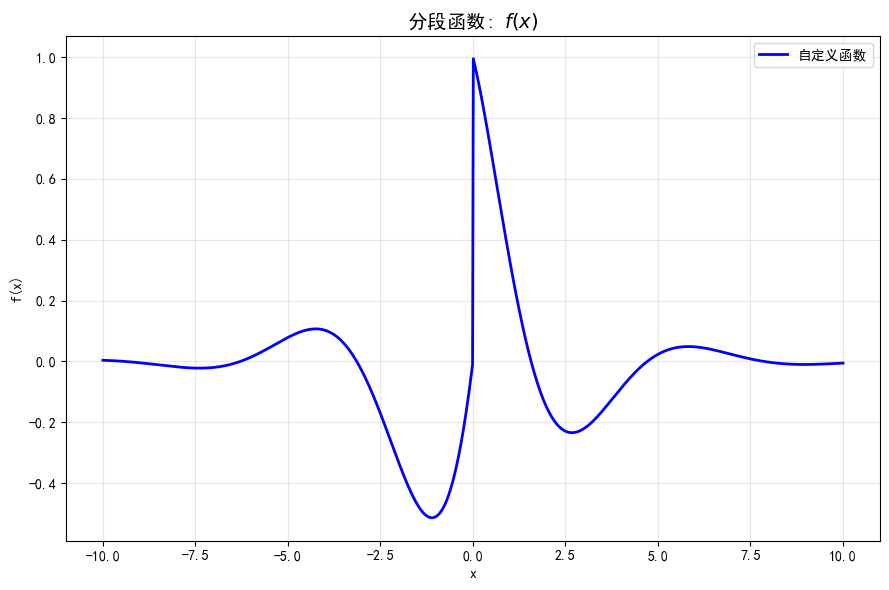

In [5]:
plt.figure(figsize=(9, 6))

# 绘制函数
plt.plot(x, y, 'b-', linewidth=2, label='自定义函数')

# 标记特殊区域
# plt.axvspan(-10, 0, alpha=0.2, color='red', label='x < 0 区域')
# plt.axvspan(0, 10, alpha=0.2, color='green', label='x ≥ 0 区域')

# 添加装饰
plt.title('分段函数: $f(x)$', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## 3D函数

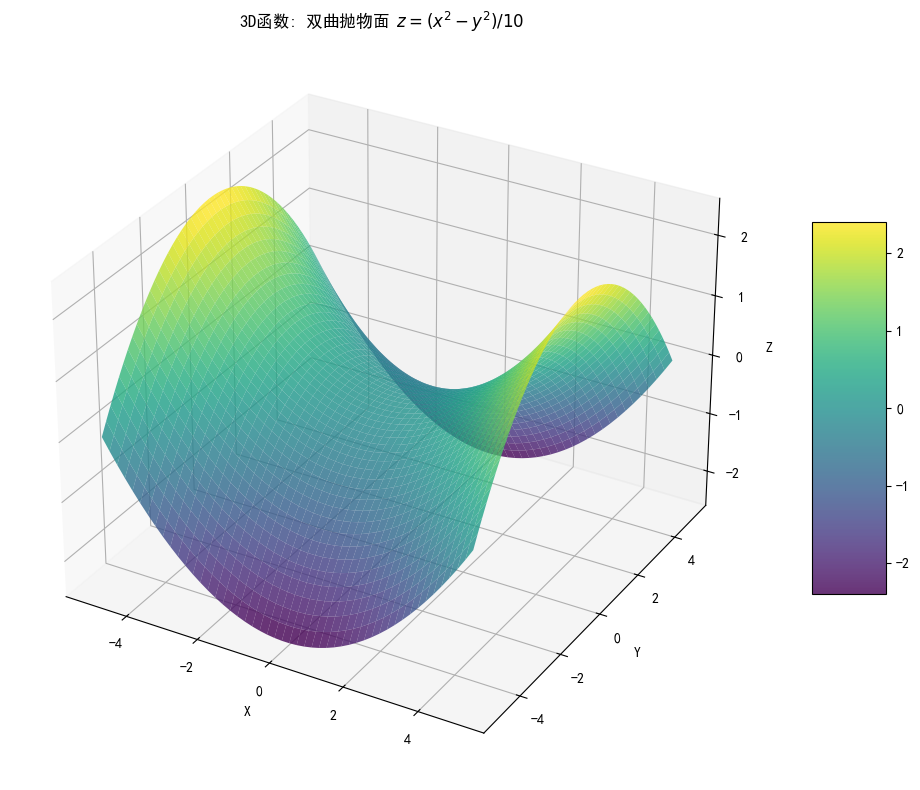

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# 创建3D图形
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成网格数据
x = torch.linspace(-5, 5, 50)
y = torch.linspace(-5, 5, 50)
X, Y = torch.meshgrid(x, y)

# 计算函数值 (例如: 双曲抛物面)
Z = (X**2 - Y**2) / 10

# 绘制3D曲面
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8,
                      linewidth=0, antialiased=True)

# 添加颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 设置标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D函数: 双曲抛物面 $z = (x^2 - y^2)/10$')

plt.tight_layout()
plt.show()

## 散点图

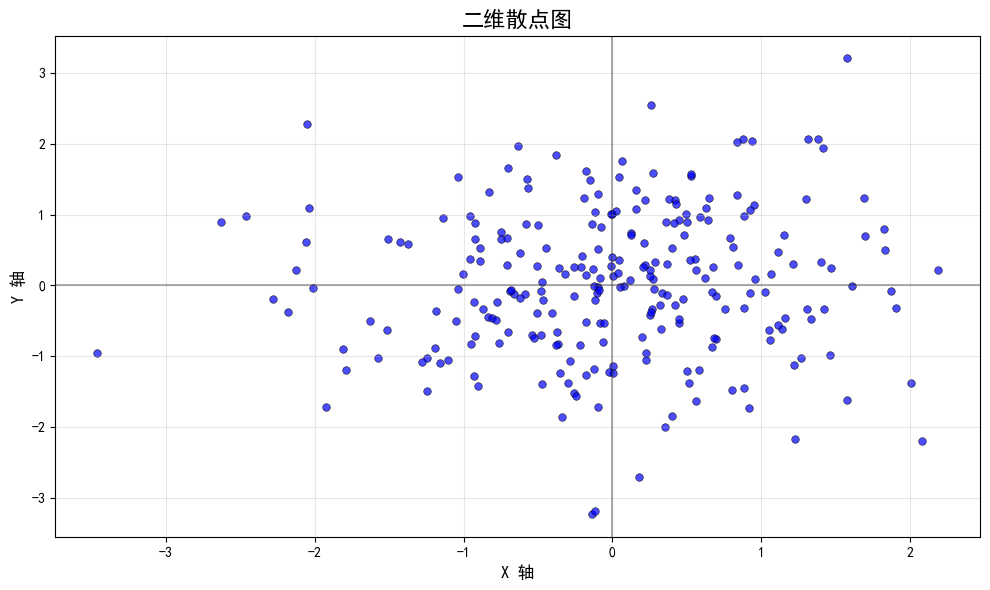

In [7]:

# 生成示例数据
x = torch.randn(250)
y = torch.randn(250)

plt.figure(figsize=(10, 6))

# 基础散点图
plt.scatter(x, y, alpha=0.7, s=30, c='blue', edgecolors='black', linewidth=0.5)

plt.title('二维散点图', fontsize=16)
plt.xlabel('X 轴', fontsize=12)
plt.ylabel('Y 轴', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

## 3维散点图

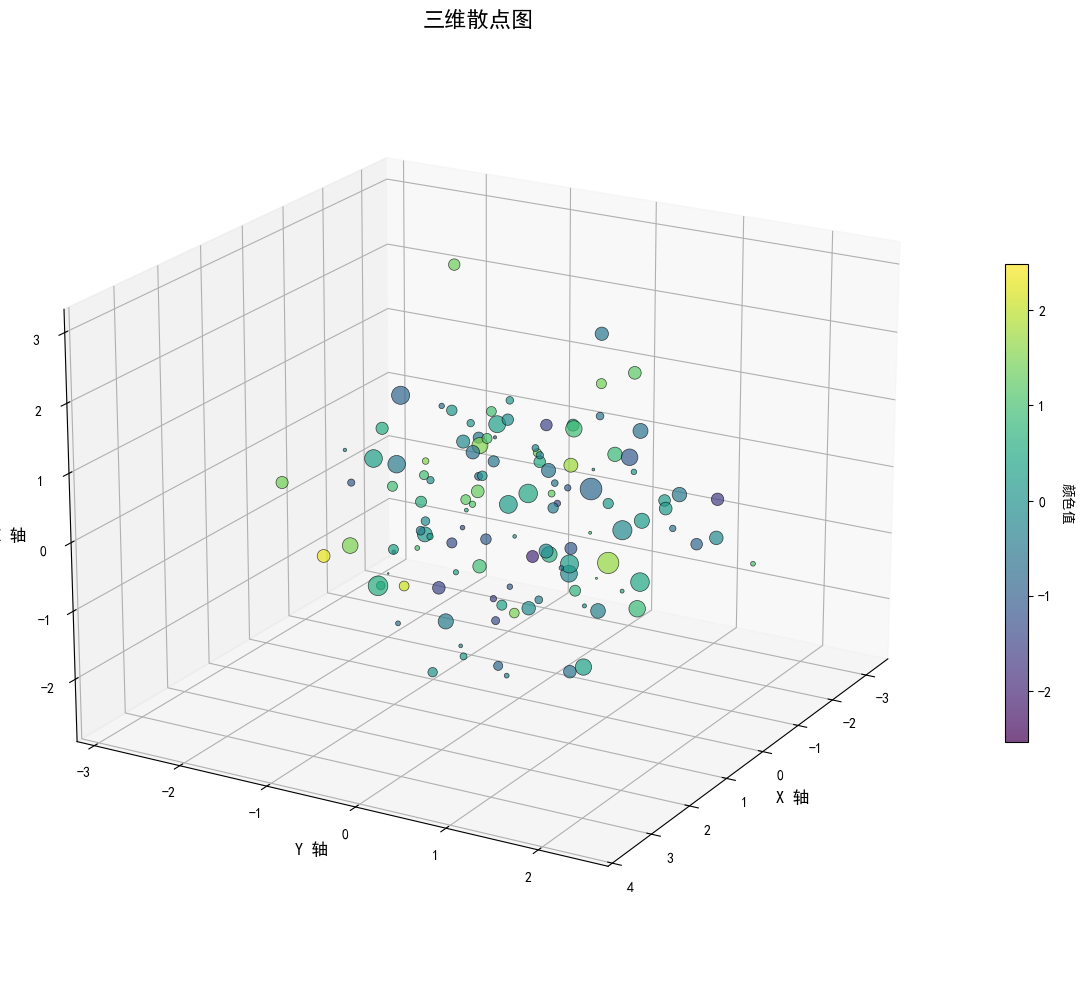

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# 生成三维数据
n_points = 250
x = torch.randn(n_points)
y = torch.randn(n_points)
z = torch.randn(n_points)
colors = torch.randn(n_points)
sizes = torch.randn(n_points)*100

# 创建3D图形
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
scatter = ax.scatter(x, y, z, c=colors, s=sizes, alpha=0.7,
                    cmap='viridis', edgecolors='black', linewidth=0.5)

# 添加颜色条
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=20)
cbar.set_label('颜色值', rotation=270, labelpad=15)

# 设置标签和标题
ax.set_xlabel('X 轴', fontsize=12)
ax.set_ylabel('Y 轴', fontsize=12)
ax.set_zlabel('Z 轴', fontsize=12)
ax.set_title('三维散点图', fontsize=16)

# 设置视角
ax.view_init(elev=20, azim=30)  # 仰角20度，方位角30度

plt.tight_layout()
plt.show()

## 子图

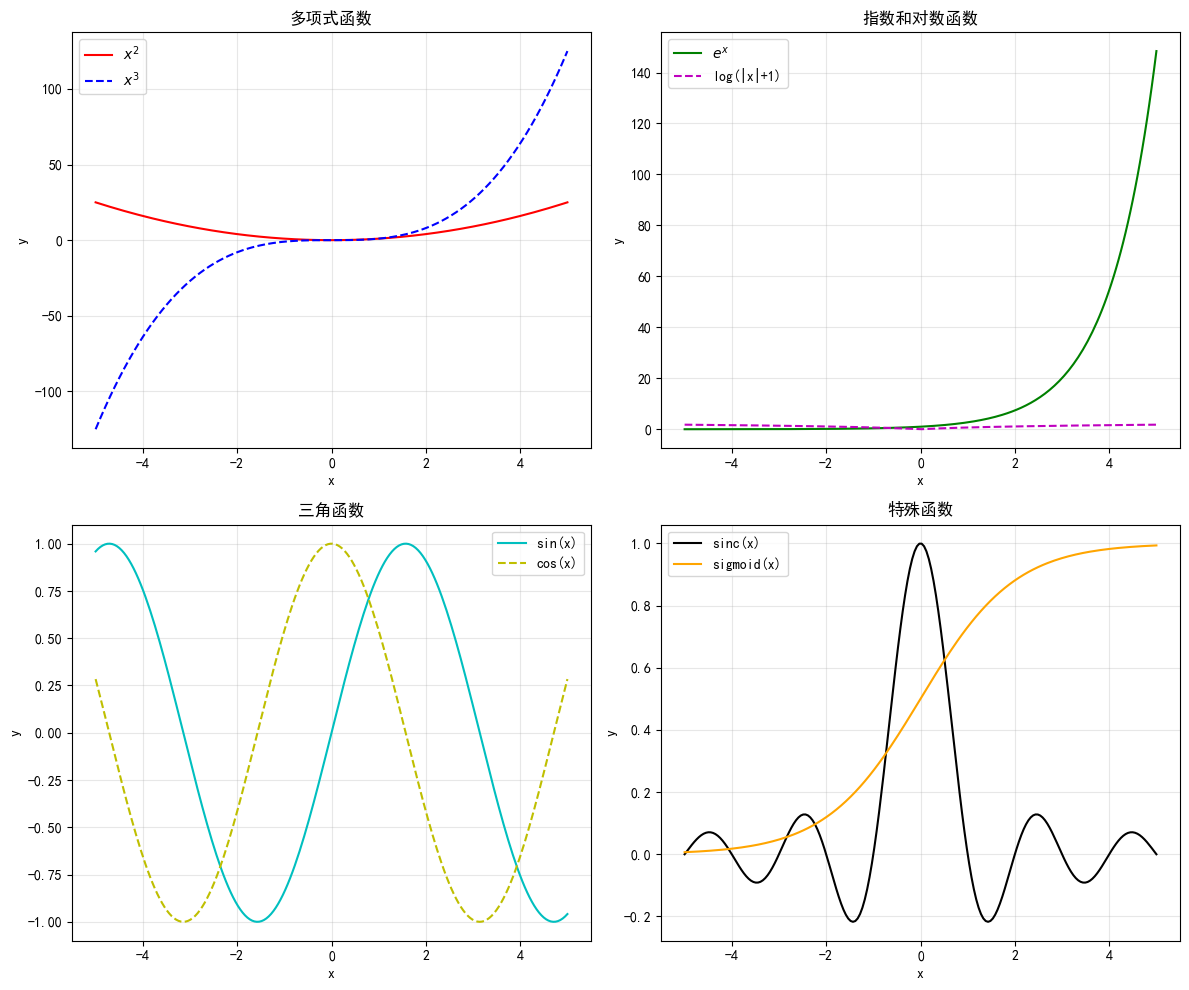

In [9]:
# 创建2x2的子图布局
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 生成 x 值
x = torch.linspace(-5, 5, 200)

# 子图1: 多项式函数
axes[0, 0].plot(x, x**2, 'r-', label='$x^2$')
axes[0, 0].plot(x, x**3, 'b--', label='$x^3$')
axes[0, 0].set_title('多项式函数')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 子图2: 指数和对数函数
axes[0, 1].plot(x, torch.exp(x), 'g-', label='$e^x$')
axes[0, 1].plot(x, torch.log(torch.abs(x) + 1), 'm--', label='log(|x|+1)')
axes[0, 1].set_title('指数和对数函数')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 子图3: 三角函数
axes[1, 0].plot(x, torch.sin(x), 'c-', label='sin(x)')
axes[1, 0].plot(x, torch.cos(x), 'y--', label='cos(x)')
axes[1, 0].set_title('三角函数')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 子图4: 特殊函数
axes[1, 1].plot(x, torch.sinc(x), 'k-', label='sinc(x)')
axes[1, 1].plot(x, 1/(1 + torch.exp(-x)), 'orange', label='sigmoid(x)')
axes[1, 1].set_title('特殊函数')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 为所有子图添加x和y标签
for ax in axes.flat:
    ax.set(xlabel='x', ylabel='y')

# 自动调整布局
plt.tight_layout()
plt.show()